## <center> Indian Famous Cuisine Recommendation </center>
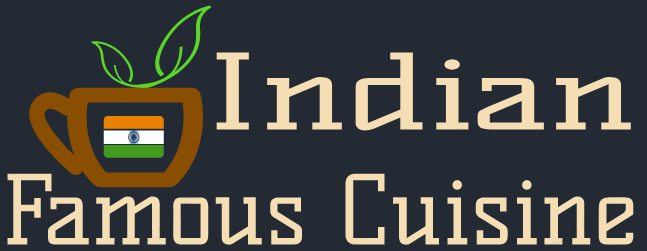


- This project is about Indian Cuisine here i have 255 famous indian dishes. When user click on dish they will get a recipe and recommendation for that particular dish. Here i have used youtube videos for cuisine recipe and i have build a machine learning model using cosine similarity for recommendation

- I have also created end to end project using flask here's the full source code link <br>https://github.com/jaysoftic/indian-famous-cuisine-recommendation
- I have deployed this end to end project on AWS Elastic Beanstalk platform here's the live demo link <br>http://indianfamouscuisinerecommendation-env.eba-pcygs8dm.us-east-2.elasticbeanstalk.com/


- This notebook is about data analysis, feature engineering and model building

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams["figure.figsize"] = (12, 6)
sns.set()

In [ ]:
main_data = pd.read_csv("../input/indian-food-101/indian_food.csv")
main_data.head()

### Exploratory Data Analysis

#### Understand the data set

In [ ]:
main_data.shape

In [ ]:
# first let's look at to the columns
main_data.columns

#### undserstand the features of data set
- here i will go through each columns

In [ ]:
# let's look at the name column

main_data.name.nunique()
# so name is indicates the name of the indian food, here we have a 255 indian food

In [ ]:
# let's remove space around name incase if the have

main_data.name = main_data.name.str.strip()

# let's convert name into lower case
main_data.name = main_data.name.str.lower()

In [ ]:
# let's look at the ingredients

# ingredients which are used to make that particular dishes

In [ ]:
# let's look at the diet

# diets can be vegetarian or Non vegetarian

main_data.diet.value_counts()

In [ ]:
# let's look at the prep time and cook time

# so prep time is preparation time of particular dish
# cook time is cooking time taken by particular dish to cook

In [ ]:
# let's look at the flavor_profile

main_data.flavor_profile.value_counts()
# so flavor_profile indicates the flavor of the food
# here we have four types of flavor
# here we can see there are some NaN value as -1

In [ ]:
# let's look at the course

main_data.course.value_counts()

# here course indicates that the cuisine is use as a main course or dessert or snack or starter

In [ ]:
# let's look at to the state

main_data.state.unique()

# here are the state of india which indicates that the foods are famous or born in that particular state

# here we can see there are some NaN value as -1

In [ ]:
# let's look at to the region

main_data.region.unique()

# here are the five region of the india which indicates where the state is belong

# here we can see there are some NaN value as -1

#### observation
##### so here we have 255 dishes and 9 columns associated with each of them which describe as follow
- name: name of the dish
- ingredients: ingredients which are used to make particular dish
- diet: It indicates that whether the dish is veg or non- veg
- prep_time: prepartion time
- cook_time: cooking time
- flavor_profile: flavor profile include that whether the dish is spicy or sweet etc
- course: course is a course of meal, the course might be main course, snack or dessert etc
- state: state where the dish is famous or born
- region: region where the state belongs

### Feature Engineering

In [ ]:
# let's check the NaN value

main_data.isna().sum()

In [ ]:
# here is NaN value in region columns

main_data[main_data.region.isna()]

In [ ]:
# so above i can see that there is a NaN value which has state is Uttar Pradesh
# so find that what is the region value where the state is Uttar Pradesh

main_data.loc[main_data.state == "Uttar Pradesh"].head()

In [ ]:
# so here we can see region is North whenver the state is Uttar Pradesh
# let's fill that NaN value of region as a North 

main_data.region.fillna("North", inplace = True)

#### Diet

In [ ]:
# let's look at to the diet

# let's replace non vegetarian to non-vaegetarian for ease of access
main_data.diet = main_data.diet.str.replace(" ", "-")

sns.countplot(data = main_data, x = "diet", palette = ["green", "red"])
plt.xlabel("Diet")
plt.ylabel("Count")
plt.title("Proporation of Diet")
plt.show()

#### observation: here vegetarian dishes are more than non - vegetarian

#### flavor_profile

In [ ]:
main_data.flavor_profile.value_counts()

In [ ]:
# we don't have any NaN value in flavor_profile but we have a -1 value in flavor profile which is likely to NaN
# so we fill that -1 to other, it's call other flavor

# so whenever it has "-1" in flavor_profile we replace it to with other

main_data.flavor_profile = main_data.flavor_profile.replace("-1", "other")

In [ ]:
main_data.flavor_profile.value_counts()

In [ ]:
# let's plot flavor_profile

sns.countplot(data = main_data, x = "flavor_profile")
plt.xlabel("Flavours")
plt.title("Test of the cuisine base on flavours")
plt.show()

#### observation: Indian are usually like spicy and sweet food

#### course

In [ ]:
# let's look at the course 
# here course are main course which usually we take at a lunch and dinner time
# dessert is a sweet basically which we take a usually after lunch and dinner
# there also some snack and starter

sns.countplot(data = main_data, x = "course")
plt.show()

#### observation: Dishes of Main Course and Dessert are hudge

#### state

In [ ]:
# let's look at the state
# state doesn't have and NaN value but state have a -1 value which is likely to NaN value
# so here 24 -1 means we have 24  NaN values
main_data.state.value_counts().head()

In [ ]:
# let's look at the data where the state value is "-1"

main_data.loc[main_data.state == "-1"].head()

In [ ]:
# so i research this on internet and i found that there are some of the dishes which are famous and common to
# all the over the state of india
# so to prevent this outlier i replace "-1" with All State

main_data.state = main_data.state.replace("-1", "All State")

In [ ]:
# let's find out number of state

main_data.state.nunique() - 1
# here we have a total 24 unique states

In [ ]:
# let's plot the number of dishes are famous or born in particular state of india

sns.countplot(data = main_data, y = "state")
plt.title("Number of Dishes which are famous or born in the State of India")
plt.ylabel("States")
plt.show()

#### observation: Diffierent states has a diffeirent cuisine but Gujarat has a highest cuisine

#### Region

In [ ]:
# let's look at the region
main_data.region.value_counts()

In [ ]:
# In region columns we don't have any NaN value but we have a -1 value which likely to NaN value

# let's look at the data where Region is -1

main_data[main_data.region == "-1"].head()

In [ ]:
# so i research this on internet and i found that there are some of the dishes which are famous and common to
# all the over the india
# so to prevent this outlier i replace "-1" with All Region

main_data.region = main_data.region.replace("-1", "All Region")

In [ ]:
# let's plot number of dishes are famous in particular region of india

sns.countplot(data = main_data, x = "region")
plt.title("Number of Dishes which are famous or born in the Region of India")
plt.xlabel("Region")
plt.show()

#### observation: Here different dishes are coming from different region of india but most of the dishes are coming from West and South side

#### prep time and cook time

In [ ]:
# let's look at the prep time
main_data.prep_time.unique()

In [ ]:
# in prep time i found that there are -1 value which is our outlier in this case

# let's look at the data where prep time is -1

main_data.loc[main_data.prep_time == -1].head()

# here are some dishes which i don't have any prep time, i'll solve it later

In [ ]:
# let's look at th cook time

main_data.cook_time.unique()

In [ ]:
# in cook time i found that there are value -1 which is outlier

# let's look at the data where cook time value is -1

main_data.loc[main_data.cook_time == -1].head()
# here some of dishes which i don't have a cook time, i will solve it later

In [ ]:
# let's plot prep time and cook time

sns.scatterplot(data = main_data, x = "prep_time", y = "cook_time",hue = "diet", palette=["green", "red"])
plt.show()

#### observation: veg and non-veg dishes take a similar amount of time

#### Ingredients

In [ ]:
# let's look at to the ingrediets which are used to make a particular dish

# first let's convert all ingredients into lower case for preventing case sensitive
main_data.ingredients = main_data.ingredients.str.lower()
# so here ingredients are a comman seprated
# let's split those ingredits and divide into veg and non-veg proporation

veg_ingredients = main_data.loc[main_data.diet == "vegetarian", "ingredients"]
non_veg_ingredients = main_data.loc[main_data.diet == "non-vegetarian", "ingredients"]

# let's check size of both ingredients and verify the whether the ingredients of all dishes are stored or not
# our total dishes are 255
veg_ingredients.size + non_veg_ingredients.size

In [ ]:
veg_ingredients.str.split(",")

In [ ]:
# let's count those ingredients for getting that how many dishes are used that particular ingrediets

# let's remove unnecessary space

veg_ingredients = veg_ingredients.str.strip()
non_veg_ingredients = non_veg_ingredients.str.strip()

veg_cleaned_ingredients = []
non_veg_cleaned_ingredients = []

for i in veg_ingredients.str.split(","): # split by "," & iterate through all the ingredients and append it to list
    veg_cleaned_ingredients += i

for i in non_veg_ingredients.str.split(","):#split by , & iterate through all the ingredients and append it to list
    non_veg_cleaned_ingredients += i

In [ ]:
# let's make a series of veg and non veg ingredients

final_veg_ingredients = pd.Series(veg_cleaned_ingredients)
final_non_veg_ingredients = pd.Series(non_veg_cleaned_ingredients)

# let's remove extra spaces
final_veg_ingredients = final_veg_ingredients.str.strip()
final_non_veg_ingredients = final_non_veg_ingredients.str.strip()

# let's count how many tim ingredients are repeated and make a data frame
final_veg_ingredients = final_veg_ingredients.value_counts().reset_index()
final_veg_ingredients.columns = ["ingredients", "count"]

final_non_veg_ingredients = final_non_veg_ingredients.value_counts().reset_index()
final_non_veg_ingredients.columns = ["ingredients", "count"]

In [ ]:
final_veg_ingredients

In [ ]:
final_non_veg_ingredients

In [ ]:
# let's plot a top 20 vegetarian ingredients

sns.barplot(data = final_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Vegetarian Dishes")
plt.show()

In [ ]:
# let's plot top 20 no vegetarian ingredients

sns.barplot(data = final_non_veg_ingredients.head(20), x = "count", y = "ingredients")
plt.title("Top 20 Ingredients for Non-Vegetarian Dishes")
plt.show()

#### observation: most of the ingredients are different in vegetarian and non-vegetarian dishes

### Feature Selection

##### here i take all the features except prep_time and cook_time because there are some value missing in prep _time and cook_time features

In [ ]:
# features i have to take all are categorical features so let's transform it into numeric using one hot encoding

data = main_data.copy()
data.head()

#### feature selection of ingredients
- Here I have a so many ingredients which are used in indian cuisine
- I take only top 20 vegetarian ingredients and top 20 non-vegetarian ingredients as my features

In [ ]:
# let's take top 20 veg and non-veg ingredients and merge it and make our final ingredient feature

top_veg_ingredients = final_veg_ingredients.head(20)
top_non_veg_ingredients = final_non_veg_ingredients.head(20)

# here let's append both and make our final ingredients

final_ingredients = top_veg_ingredients.append(top_non_veg_ingredients).reset_index(drop = True)
final_ingredients.head()

In [ ]:
# here i took a ingredients separately from vegetarian and non vegetarian so that might be chance that it has some
# duplicate ingredients so let's check it

final_ingredients[final_ingredients.ingredients.duplicated(keep = False)]

In [ ]:
# so here i can see that some of the ingredients are found as duplicated so let's merge it using group by

final_ingredients = final_ingredients.groupby("ingredients")["count"].sum().reset_index()

# let's sort it by count

final_ingredients = final_ingredients.sort_values("count", ascending = False).reset_index(drop = True)
final_ingredients.head()

In [ ]:
# let's find out the total ingredients

final_ingredients.ingredients.nunique()
# so we have total 35 ingredients

In [ ]:
# now let's do one hot encoding to ingredients
# so here in our data set i have a comma separated ingredients so i use contain() of string to match
# our final ingredients and if it is found then i put 1 other wise 0


for i in final_ingredients.ingredients:
    data[i] = 0 # here i create a column of particular ingredients and assign all value as 0
    data.loc[data.ingredients.str.contains(i), [i]] = 1
    # above i put 1 on that column which dishes has include that particular ingredients

In [ ]:
data.head(2)

#### feature selection of diet

In [ ]:
# let's encode veg and non veg using label encoding

# here i drop first column which is non vegetarian for preventing dummy variable trap
diet_encoding = pd.get_dummies(main_data.diet, drop_first=True)
diet_encoding.head()

In [ ]:
# now let's concat it with our "data" data frame

data = pd.concat([data, diet_encoding], axis = 1)
data.head(2)

#### feature selection of flavor_profile

In [ ]:
# let's encode flavor_profile using one hot encoding

# here i drop a first column which is bitter for preventing dummy variable trap
flavor_profile_encoding = pd.get_dummies(main_data.flavor_profile, drop_first=True)
flavor_profile_encoding.head(2)

In [ ]:
# now let's concat it with our main "data" data frame

data = pd.concat([data, flavor_profile_encoding], axis = 1)
data.head(2)

#### feature selection of course

In [ ]:
# let's encode course using one hot encoding

# here i drop first column which is dessert for preventing dummy variable trap
course_encoding = pd.get_dummies(main_data.course, drop_first = True)
course_encoding.head(2)

In [ ]:
# let's concat it with our main "data" data frame

data = pd.concat([data, course_encoding], axis = 1)
data.head(2)

#### feature selection of state

In [ ]:
# let's encode the state using one hot encoding

# here i drop first column which is All State for preventing dummy variable trap
state_encoding = pd.get_dummies(main_data.state, drop_first = True)
state_encoding.head(2)

In [ ]:
# let's concat it with our main "data" data frame

data = pd.concat([data, state_encoding], axis = 1)
data.head(2)

#### feature selection region

In [ ]:
# let's encode region using one hot encoding

# here i drop first column which is All Region for preventing dummy variable trap
region_encoding = pd.get_dummies(main_data.region, drop_first = True)
region_encoding.head(2)

In [ ]:
# let's concat it with main "data" data frame

data = pd.concat([data, region_encoding], axis = 1)
data.head(2)

#### creating final data frame

In [ ]:
# let's create a final data frame
# let's remove unnecessary columns which are not required not and store it as final_data

final_data = data.drop(columns = ['ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'])

final_data.head()

In [ ]:
# here i'm going to use Nearest Neighbors using cosine similarity so for model purpose let's take name column
# as a index

final_data.set_index("name", inplace = True)
final_data.head()

### Model Builiding

In [ ]:
# here i'm going to use cosine similarity for recommend the cuisine
# cosine similarity is nothing but a degree between two data points or two similar type of data

# here i'm going to use Nearest Neighbors for implementing cosine distance
# consine distance = 1 - consine similarity

# here i use Nearest Neighbors with metric cosine and brute algorithm

from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric = "cosine", algorithm = "brute")
model.fit(final_data)

In [ ]:
# now our model is ready so let's test it

picked_cuisine = final_data.index[np.random.choice(final_data.shape[0])]
picked_cuisine

In [ ]:
# now let's find similarity or recommened cuisine using our model
# our model return distance and index
# distance is indicates that how far that similarity of that recommended cuisine with our picked cuisine
# index indicates a index of our final data which is a name of cuisine

# here i want 10 recommended cuisine for my picked cuisine

distance, cuisine_index = model.kneighbors(final_data[final_data.index == picked_cuisine], n_neighbors = 11)

In [ ]:
distance

In [ ]:
cuisine_index

In [ ]:
# let's print it in proper way

# these are 2D arrays so let's convert it into 1D

distance = distance.flatten()
cuisine_index = cuisine_index.flatten()

# probably first one is always our picked cuisine

print("Recommendation for ", picked_cuisine, " are following")

count = 1
for i in range(cuisine_index.size):
    if final_data.index[cuisine_index[i]] == picked_cuisine:
        continue
    print(count, ". ", final_data.index[cuisine_index[i]], " with distance ", distance[i])
    count += 1

In [ ]:
# let's export our main data for showing data on web app
main_data.to_csv("cleaned_data.csv", index = False)

# let's export our final_data, it will used on frontend for getting recommendation
final_data.to_csv("model_data.csv")

In [ ]:
# let's export model using pickle file

import pickle

with open("model.pickle", "wb") as f:
    pickle.dump(model, f)